<a href="https://colab.research.google.com/github/MLopita/Hotel-harmony/blob/main/Hotel_Harmony_Data_Insights_for_Optimized_Operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import numpy as np
from datetime import datetime
import calendar
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv('/hotel_bookings.csv')

In [45]:
df.shape

(119390, 32)

In [46]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [48]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
hotel,119390,2,City Hotel,79330,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_canceled,119390.0,NaN,NaN,NaN,0.370416,0.482918,0.0,0.0,0.0,1.0,1.0
lead_time,119390.0,NaN,NaN,NaN,104.011416,106.863097,0.0,18.0,69.0,160.0,737.0
arrival_date_year,119390.0,NaN,NaN,NaN,2016.156554,0.707476,2015.0,2016.0,2016.0,2017.0,2017.0
arrival_date_month,119390,12,August,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_date_week_number,119390.0,NaN,NaN,NaN,27.165173,13.605138,1.0,16.0,28.0,38.0,53.0
arrival_date_day_of_month,119390.0,NaN,NaN,NaN,15.798241,8.780829,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,119390.0,NaN,NaN,NaN,0.927599,0.998613,0.0,0.0,1.0,2.0,19.0
stays_in_week_nights,119390.0,NaN,NaN,NaN,2.500302,1.908286,0.0,1.0,2.0,3.0,50.0
adults,119390.0,NaN,NaN,NaN,1.856403,0.579261,0.0,2.0,2.0,2.0,55.0


In [49]:
df.isnull().sum().sort_values(ascending=False).head(20)

,0
company,112593
agent,16340
country,488
children,4
arrival_date_month,0
arrival_date_week_number,0
hotel,0
is_canceled,0
stays_in_weekend_nights,0
arrival_date_day_of_month,0


**Data Cleaning**

In [50]:
df['children'].fillna(0, inplace=True)

/tmp/ipython-input-289084130.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].fillna(0, inplace=True)


In [51]:
df['agent'].fillna(0, inplace=True)

/tmp/ipython-input-2085200365.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['agent'].fillna(0, inplace=True)


In [52]:
df['country'].fillna('Unknown', inplace=True)

/tmp/ipython-input-2372192134.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('Unknown', inplace=True)


In [53]:
df['company'].fillna(0, inplace=True)

/tmp/ipython-input-48701503.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['company'].fillna(0, inplace=True)


In [54]:
df.isnull().sum().sort_values(ascending=False).head(20)

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [55]:
df.drop_duplicates(inplace=True)

In [56]:
df['children'] = df['children'].astype(int)

In [57]:
df['agent'] = df['agent'].astype('Int64')

In [58]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], errors='coerce')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87396 non-null  object        
 1   is_canceled                     87396 non-null  int64         
 2   lead_time                       87396 non-null  int64         
 3   arrival_date_year               87396 non-null  int64         
 4   arrival_date_month              87396 non-null  object        
 5   arrival_date_week_number        87396 non-null  int64         
 6   arrival_date_day_of_month       87396 non-null  int64         
 7   stays_in_weekend_nights         87396 non-null  int64         
 8   stays_in_week_nights            87396 non-null  int64         
 9   adults                          87396 non-null  int64         
 10  children                        87396 non-null  int64         
 11  babies

In [60]:
month_map = {m: i for i,m in enumerate(calendar.month_name) if m}
df['arrival_date'] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + '-' +
    df['arrival_date_month'].map(lambda x: str(month_map.get(x, 0))) + '-' +
    df['arrival_date_day_of_month'].astype(str),
    errors='coerce'
)

df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['total_guests'] = df['adults'].fillna(0) + df['children'] + df['babies'].fillna(0)
df = df[df['total_guests'] > 0]
df = df[df['adr'] >= 0]

In [61]:
df.shape

(87229, 35)

In [62]:
df.to_csv('hotel_bookings_cleaned.csv', index=False)

**Basic Level Questions with Solution Ideas**

1. What is the average lead time for bookings?


In [63]:
df['lead_time'].mean()

np.float64(79.96970044365979)

2. What is the distribution of bookings by hotel type?

In [64]:
df['hotel'].value_counts()

,count
hotel,
City Hotel,53274
Resort Hotel,33955


3. How many bookings were canceled?

In [65]:
df['is_canceled'].sum()

np.int64(24009)

4. What is the most common arrival month for bookings?

In [66]:
df['arrival_date_month'].mode()[0]

'August'

5. What is the average number of special requests per booking?

In [67]:
df['total_of_special_requests'].mean()

np.float64(0.698941865663942)

6. Which country has the highest number of bookings?

In [68]:
df['country'].value_counts().head(10)

,count
country,
PRT,27355
GBR,10423
FRA,8823
ESP,7244
DEU,5385
ITA,3061
IRL,3015
BEL,2081
BRA,1993


7. What is the average daily rate (ADR) for each hotel type?

In [69]:
df.groupby('hotel')['adr'].mean()

,adr
hotel,
City Hotel,111.271969
Resort Hotel,99.062622


8. What percentage of guests required car parking spaces?

In [70]:
(df['required_car_parking_spaces'] > 0).mean()

np.float64(0.08375654885416547)

9. What is the average stay duration in week nights and weekend nights?

In [71]:
df[['stays_in_week_nights','stays_in_weekend_nights']].mean()

,0
stays_in_week_nights,2.623887
stays_in_weekend_nights,1.004574


10. How many bookings were made through travel agents?

In [72]:
(df['agent'] != 0).sum()

np.int64(75088)

**Medium Level Questions**

1. What is the cancellation rate for each hotel type?


In [73]:
df.groupby('hotel')['is_canceled'].mean().sort_values(ascending=False)

,is_canceled
hotel,
City Hotel,0.300991
Resort Hotel,0.234840


2. What is the average ADR per market segment?

In [74]:
df.groupby('market_segment')['adr'].mean().sort_values(ascending=False)

,adr
market_segment,
Online TA,118.296093
Direct,116.784056
Aviation,100.613628
Offline TA/TO,81.948897
Groups,75.184371
Corporate,68.344298
Undefined,15.000000
Complementary,3.093309


3. What is the relationship between lead time and cancellation rate?

,lead_time
is_canceled,
0,70.183581
1,105.738306


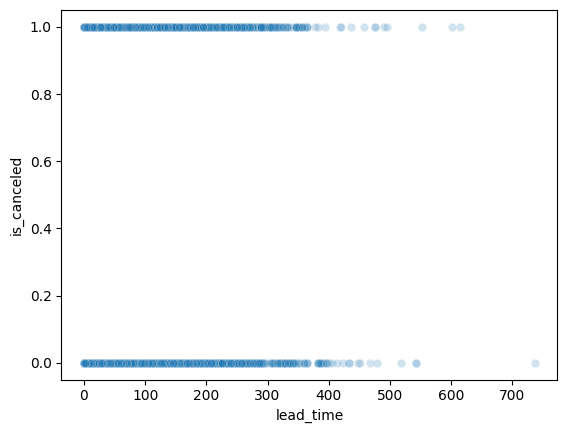

In [75]:
sns.scatterplot(x='lead_time', y='is_canceled', data=df.sample(5000), alpha=0.2)
df.groupby('is_canceled')['lead_time'].mean()

4. Which distribution channel has the highest number of bookings?

In [76]:
df['distribution_channel'].value_counts()

,count
distribution_channel,
TA/TO,69028
Direct,12953
Corporate,5062
GDS,181
Undefined,5


5. What is the average number of previous cancellations by hotel type?

In [77]:
df.groupby('hotel')['previous_cancellations'].mean()

,previous_cancellations
hotel,
City Hotel,0.035759
Resort Hotel,0.022000


6. What is the trend of ADR over the years?

<Axes: xlabel='arrival_date_year'>

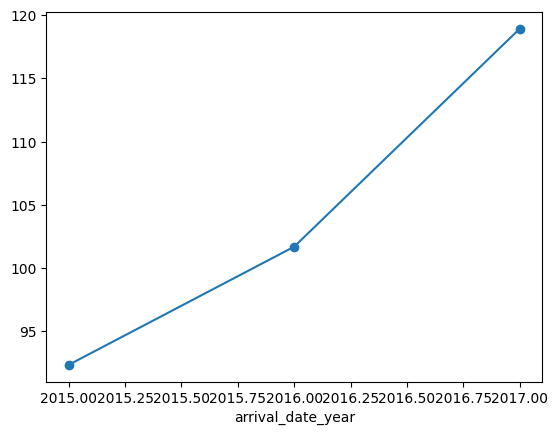

In [78]:
df.groupby('arrival_date_year')['adr'].mean().plot(marker='o')

7. Which month has the highest revenue?

In [79]:
df['revenue'] = df['adr'] * df['total_nights']

monthly_rev = df.groupby(df['arrival_date'].dt.to_period('M'))['revenue'].sum()

print(monthly_rev.sort_values(ascending=False).head(5))

arrival_date
2017-08    3131402.33
2017-07    2841704.81
2016-08    2701783.79
2016-07    2093982.77
2017-06    2086028.60
Freq: M, Name: revenue, dtype: float64


8. What is the impact of special requests on ADR?

In [80]:
df.groupby('total_of_special_requests')['adr'].mean()

,adr
total_of_special_requests,
0,99.889303
1,109.785310
2,118.699924
3,125.232939
4,131.088687
5,129.980000


9. What is the average stay duration for repeated guests versus new guests?

In [81]:
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df.groupby('is_repeated_guest')['total_nights'].mean()

,total_nights
is_repeated_guest,
0,3.695765
1,1.950045


10. Which room type has the highest number of bookings?

In [82]:
df['reserved_room_type'].value_counts().head()

,count
reserved_room_type,
A,56435
D,17376
E,6036
F,2820
G,2050


**Advanced Level**

1. What is the impact of booking changes on guest satisfaction as indicated by special requests?

<Axes: xlabel='booking_changes', ylabel='total_of_special_requests'>

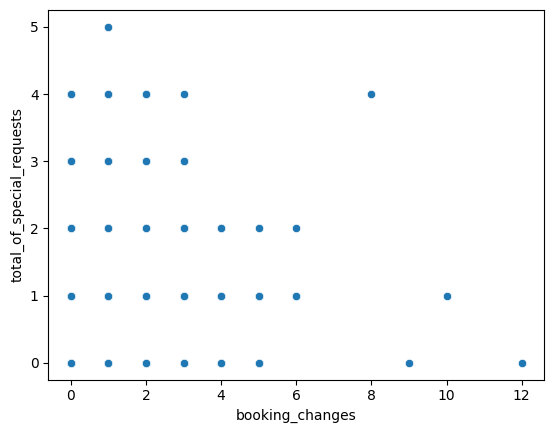

In [83]:
df[['booking_changes','total_of_special_requests']].corr().iloc[0,1]
sns.scatterplot(x='booking_changes', y='total_of_special_requests', data=df.sample(5000))

2. What is the seasonal impact on booking cancellations?



Text(0.5, 1.0, 'Cancellation rate by month')

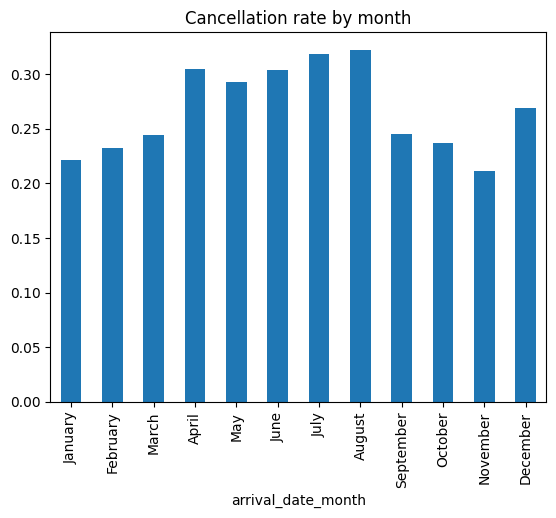

In [84]:

month_order = list(calendar.month_name)[1:]
cancel_by_month = df.groupby('arrival_date_month')['is_canceled'].mean().reindex(month_order)
cancel_by_month.plot(kind='bar'); plt.title('Cancellation rate by month')

3. How does the booking lead time distribution vary between different market segments?

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Direct'),
  Text(1, 0, 'Corporate'),
  Text(2, 0, 'Online TA'),
  Text(3, 0, 'Offline TA/TO'),
  Text(4, 0, 'Complementary'),
  Text(5, 0, 'Groups'),
  Text(6, 0, 'Undefined'),
  Text(7, 0, 'Aviation')])

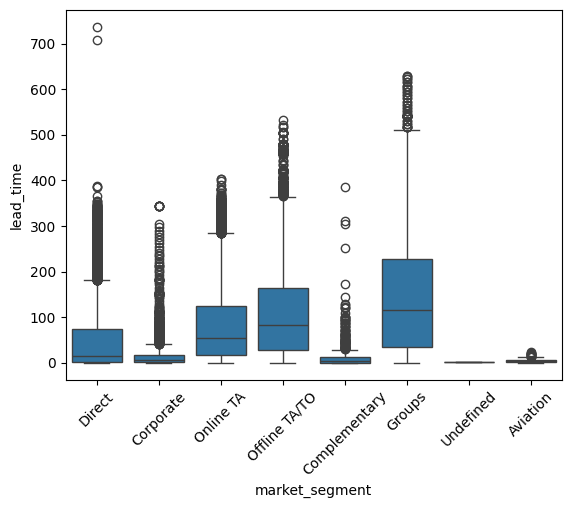

In [85]:
sns.boxplot(x='market_segment', y='lead_time', data=df);
plt.xticks(rotation=45)